# Titanic: Machine Learning from Disaster - Kaggle数据分析项目

### 数据分析预测步骤
- Defining the problem statement - 明确问题
- Understand the background - 了解背景
- Collecting the data - 收集数据
- Exploratory data analysis - 探索性数据分析
- Clean data based on analysis - 数据清理
- Feature engineering - 特征工程
- Modelling - 机器学习建模
- Deployment - 发布结果

## 1. Defining the problem statement - 明确问题
本次预测分析的目的是通过表格提供的数据去预测泰坦尼克号乘客的生还状况。 

## 2. Understand the Background - 了解背景

泰坦尼克号死亡惨重主要原因是因为撞击冰山，救生船不够，落水的乘客在北冰洋被冻死。

我们可以得知船撞击冰山后，船尾先沉没，中途船断裂后，船前部垂直落水。

从座舱分布来看，Third Class的后部座舱先进水，然后是First Class的后部座舱，最后是Second Class的座舱。

这意味着，座舱和阶层很有可能成为生还的重要因素，其次根据常识，我们可以猜测性别，年龄和家庭状况也是能不能生还的重要因素。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd '/content/drive/MyDrive/Kaggle-Titanic-Project/'

## 3. Collecting the data - 收集数据
我们用pandas包load两个需要使用的数据集：train.csv和test.csv。

In [3]:
import pandas as pd

train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

## 4. Exploratory data analysis - 探索性数据分析
首先，我们使用head方法去查看train数据集的前5排数据：

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


同样，我们使用head方法去查看test数据集的前5排数据：

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


然后，我们通过shape方法去查看train和test数据集的dimension（排数与列数）。

我们可以发现test比train少了一列，这一列是*Survived*。

In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

我们可以使用info方法去查看train和test每一列数据的属性（column名，column类型，column的non-null个数）。

我们可以发现*Age*，*Embarked*和*Fare*有部分的数据缺失，*Cabin*有大量的数据缺失，我们将在后面对这四列的缺失值进行处理。

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


接下来我们使用describe方法对numeric以及object数据进行统计。

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sutehall, Mr. Henry Jr",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [12]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Thomas, Mr. Charles P",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


### Explore Visualization of Raw Data - 对数据的可视化探索
接下来我们将调用matplotlib的pyplot来可视化我们的数据集。

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

首先我们列举所有的categorical数据,numeric数据以及特殊数据的column名：

In [15]:
categorical = ['Survived','Pclass','Sex','Embarked','SibSp','Parch']
numeric = ['Age','Fare']
special = ['PassengerId','name','Ticket','Cabin']

我们将对以上三种数据分别选择合适的统计图进行可视化：

categorical数据使用bar统计图，用于分析数据的Frequency分布。

numeric数据使用histogram统计图，用于分析数据的Frequency分布。

special部分无统计意义，或需要数据预处理，将在预处理后使用bar统计图探索分析。

首先我们可视化所有categorical数据。

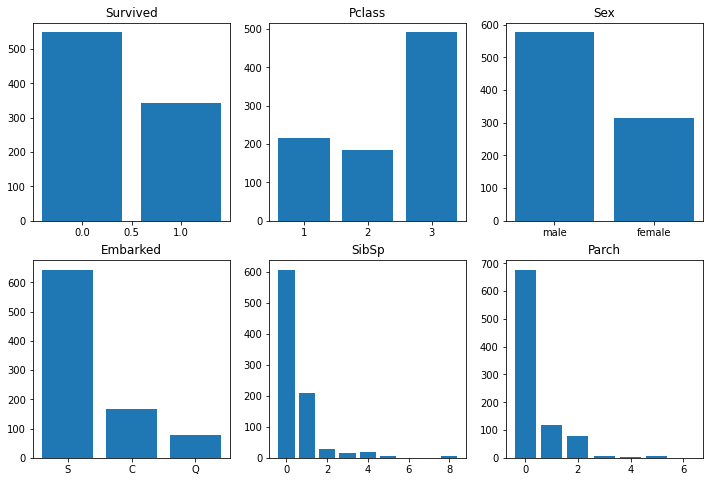

In [16]:
fig = plt.figure(figsize=(12,8))
for i in range(6):
    ax = fig.add_subplot(2,3,i+1)
    frequency = train[categorical].iloc[:,i].value_counts()
    ax.bar(frequency.index,frequency.values)
    plt.title(categorical[i])
plt.show()

从图中，我们可以看出以下信息：

死亡人数远高于生还人数。

第三阶层的人数远高于第一第二阶层，第一第二阶层人数类似。

男性人数远高于女性人数。

S港登船的人数远高于C和Q港，C港人数比Q港多。

绝大部份的人是没有亲戚或伴侣在身边的，其次是部分人只有一个亲戚或伴侣在身边。

绝大部份的人是没有家人在身边的，其次是部分人只有一个或两个家人在身边。

接下来，我们可视化所有的numeric数据。

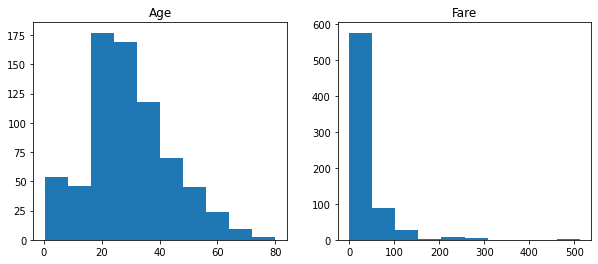

In [17]:
fig = plt.figure(figsize=(10,4))
data = train[numeric].copy()
data = data.dropna()
for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    ax.hist(data.iloc[:,i])
    plt.title(numeric[i])
plt.show()

我们知道Age有大量的缺失值，不过暂时不影响我们了解Age的insight。

从图中，我们可以得出以下信息：

绝大多数的乘客的年龄在20岁到40岁之间。

绝大多数的船票都是在0到50元之间，有极少数的昂贵船票。

接下来我们来探索special数据。

首先我们将不对PassengerId以及Ticket进行探索，因为这些数据属于无统计意义的。

我们发现Cabin数据的开头字母代表船舱号，我们提取开头字母，将其生成Cabin_label数据。

然后drop掉Cabin数据。

In [18]:
train["Cabin_label"] = train["Cabin"].str[0]
test["Cabin_label"] = test["Cabin"].str[0]
train.drop("Cabin",axis=1,inplace=True)
test.drop("Cabin",axis=1,inplace=True)

我们也发现Name的中有乘客的尊称，我们将使用正则表达式提取尊称来探索分析数据。

然后drop掉Name数据。

In [19]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train.drop("Name",axis=1,inplace=True)
test.drop("Name",axis=1,inplace=True)

由于Ticket没有统计意义，所以我们将删除Ticket数据。

In [20]:
train.drop("Ticket",axis=1,inplace=True)
test.drop("Ticket",axis=1,inplace=True)

我们使用head方法来查看处理好的数据集：

In [21]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_label,Title
0,1,0,3,male,22.0,1,0,7.2500,S,NaN,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,NaN,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,C,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,NaN,Mr


In [22]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_label,Title
0,892,3,male,34.5,0,0,7.8292,Q,NaN,Mr
1,893,3,female,47.0,1,0,7.0000,S,NaN,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,NaN,Mr
3,895,3,male,27.0,0,0,8.6625,S,NaN,Mr
4,896,3,female,22.0,1,1,12.2875,S,NaN,Mrs


接下来我们使用value_counts方法来探索刚处理好的两个数据。

In [23]:
train["Cabin_label"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_label, dtype: int64

In [24]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Sir           1
Mme           1
Don           1
Capt          1
Ms            1
Lady          1
Countess      1
Name: Title, dtype: int64

我们发现Title数据有过多的categories，并且许多categories只有几个数据。

因此，我们决定将所有的尊称分为4类: Mr，Mrs，Miss和Other。

In [25]:
title_mapping = {"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Other", "Dr":"Other", "Rev":"Other", "Col": "Other", "Major": "Other", "Mlle": "Other","Countess": "Other",
"Ms": "Other", "Lady": "Other", "Jonkheer": "Other", "Don": "Other", "Dona" : "Other", "Mme": "Other","Capt": "Other","Sir": "Other" }
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

接下来我们使用bar来可视化Cabin_label以及Title数据。

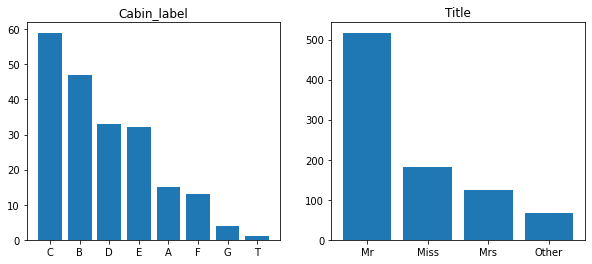

In [26]:
fig = plt.figure(figsize=(10,4))
dataset = ["Cabin_label","Title"]
for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    frequency = train[dataset].iloc[:,i].value_counts()
    ax.bar(frequency.index,frequency.values)
    plt.title(dataset[i])
plt.show()

从图中我们可以看出以下信息：

C座舱人数最多，T座舱人数最少。

Mr男性人数远高于其它人，女性中Miss高于Mrs的人数。

## 5. Clean data based on analysis  - 数据清理

我们已经运用可视化完成了对所有column数据的探索分析，接下来我们将进行以下步骤：

我们将根据探索分析数据的结果对缺失值数据进行填充处理。

首先，我们重新使用isnull和sum方法去确认缺失值的位置。

In [27]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Cabin_label    687
Title            0
dtype: int64

In [28]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Embarked         0
Cabin_label    327
Title            0
dtype: int64

根据之前的可视化分析，我们发现最多登船的港口是S港，所以我们将用S填充Embarked的缺失值。

In [29]:
train["Embarked"] = train["Embarked"].fillna("S")

我们将使用第三阶层Fare的median值来填充Fare的缺失值。

In [30]:
test[test["Fare"].isnull()]["Pclass"]
test["Fare"].fillna(test[test["Pclass"]==3]["Fare"].median(),inplace=True)

我们来填充Cabin_label数据，根据之前的可视化分析，虽然Cabin_label有大量的缺失值，但从剩下的sample仍然具备一定的统计意义。

但是，当我们以阶层为划分条件去探索Cabin_label的数据时，我们发现几乎所有剩下的Cabin_label数据都属于第一阶层。

In [31]:
Cabin_1 = train[train['Pclass']==1]["Cabin_label"].notnull().sum()
Cabin_2 = train[train['Pclass']==2]["Cabin_label"].notnull().sum()
Cabin_3 = train[train["Pclass"]==3]["Cabin_label"].notnull().sum()
Cabin_1,Cabin_2,Cabin_3

(176, 16, 12)

这意味着我们很难预测第二第三阶层的Cabin_label信息。所以我们决定删除Cabin_label数据。

In [32]:
train.drop("Cabin_label",axis=1,inplace=True)
test.drop("Cabin_label",axis=1,inplace=True)

最后，我们用info方法来检查一下清理数据是否已完成。

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Title        891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Title        418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


我们可以发现只剩下Age数据，由于Age数据缺失过多，我们决定在下一个部分使用机器学习预测来填充缺失值。

## 6. Feature engineering - 特征工程

接下来我们将进行以下步骤：

- 使用数据透视表研究categorical数据与Survived的关联并做特征处理。
- 使用机器学习预测Age数据的缺失值。
- 归一化所有数据。

首先，我们使用head方法来查看的数据集：

In [35]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


In [36]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr
1,893,3,female,47.0,1,0,7.0000,S,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,Mr
3,895,3,male,27.0,0,0,8.6625,S,Mr
4,896,3,female,22.0,1,1,12.2875,S,Mrs


我们将创造一个新的特征FamilySize，这是因为我们观察到SibSp和Parch可以合成一个船上家庭的人数。

In [37]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

接下来我们将使用数据透视表研究categorical数据分布与Survived数据的关系，并根据关系对所有categorical数据进行特征处理。

In [38]:
pclass_band = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Pclass', ascending=True)
pclass_mapping = dict(pclass_band.values)
train["Pclass"] = train["Pclass"].map(pclass_mapping)
test["Pclass"] = test["Pclass"].map(pclass_mapping)
pclass_band

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [39]:
sex_band = train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex', ascending=True)
sex_mapping = dict(sex_band.values)
train["Sex"] = train["Sex"].map(sex_mapping)
test["Sex"] = test["Sex"].map(sex_mapping)
sex_band

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [40]:
embarked_band = train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Embarked', ascending=True)
embarked_mapping = dict(embarked_band.values)
train["Embarked"] = train["Embarked"].map(embarked_mapping)
test["Embarked"] = test["Embarked"].map(embarked_mapping)
embarked_band

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [41]:
title_band = train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Title', ascending=True)
title_mapping = dict(title_band.values)
train["Title"] = train["Title"].map(title_mapping)
test["Title"] = test["Title"].map(title_mapping)
title_band

,Title,Survived
0,Miss,0.697802
1,Mr,0.156673
2,Mrs,0.792000
3,Other,0.522388


根据之前的Age可视化分析，我们发现Age的数据分布不够正太，所以我们决定使用median作为填充值。

但是直接使用所有数据的median值不够reliable并且缺失值数量不少，所以我们决定使用机器学习建模预测来填充数据。

In [ ]:
fill_data = train.drop(["PassengerId","Survived"], axis=1)
fill_train_data = fill_data[~fill_data["Age"].isnull()]
fill_train_label = fill_train_data["Age"]
fill_train_data.drop("Age", axis=1, inplace=True)
fill_test_data = fill_data[fill_data["Age"].isnull()]
fill_test_data.drop("Age", axis=1, inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(fill_train_data, fill_train_label)
fill_test_age = lr.predict(fill_test_data)
fill_test_age[fill_test_age < 0] = 0
train["Age"][train["Age"].isnull()] = fill_test_age

In [ ]:
fill_data = test.drop(["PassengerId"], axis=1)
fill_train_data = fill_data[~fill_data["Age"].isnull()]
fill_train_label = fill_train_data["Age"]
fill_train_data.drop("Age", axis=1, inplace=True)
fill_test_data = fill_data[fill_data["Age"].isnull()]
fill_test_data.drop("Age", axis=1, inplace=True)

In [ ]:
fill_test_age = lr.predict(fill_test_data)
fill_test_age[fill_test_age < 0] = 0
test["Age"][test["Age"].isnull()] = fill_test_age

接下来，我们进行数据集的归一化处理，以便统一所有数据的Scale。

在归一化之前，我们也将删除PassengerId，因为它是nominal数据，不能带来有效的统计意义。

这里需要暂时保留test的PassengerId，后面需要使用到它。

In [46]:
train.drop("PassengerId",axis=1,inplace=True)
test_id = test["PassengerId"]

我们将train数据集的Survived数据存储到target上，用来做机器学习的训练集label使用。

删除train数据集的Survived数据，因为我们不能将label作为训练集的特征。

In [47]:
train_data = train.drop('Survived', axis=1)
test_data = test.drop('PassengerId', axis=1)
target = train['Survived']

现在进行归一化的操作，对column数据进行归一化。

In [48]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
train_data = standard_scaler.fit_transform(train_data)
test_data = standard_scaler.fit_transform(test_data)

## 6. Modelling - 机器学习建模

我们将使用常见的机器学习模型以及集成机器学习方法来训练我们的模型。

我们将从以下几个步骤来训练模型：

- 预选模型，通过GridSearchCV进行参数调整。

- 通过accuracy以及交叉检验来评估各个模型的性能。

- 尝试使用Ensemble来提高机器学习模型的效果。

- 选取效果最好的模型用于test数据集的预测。

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import numpy as np

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

我们将使用K-fold交叉检验与Grid SearchCV方法寻找到每个模型最好的参数并训练模型。

In [50]:
param_grid = [
    {'n_estimators': [i for i in range(1,30,2)], 'max_depth': [i for i in range(1,10)]},
]
rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(rf_clf, param_grid, cv=10, scoring='accuracy', return_train_score=True)
grid_search.fit(train_data, target)
rf_clf = grid_search.best_estimator_
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 23}

In [51]:
from sklearn.metrics import accuracy_score
prediction = rf_clf.predict(train_data)
accuracy = accuracy_score(target,prediction)
accuracy

0.8484848484848485

In [52]:
score = cross_val_score(rf_clf, train_data, target, cv=k_fold, n_jobs=-1, scoring='accuracy')
round(np.mean(score)*100, 2)

83.17

In [53]:
param_grid = [
    {'weights':['distance'],'n_neighbors': [i for i in range(5,20)]},
    {'weights':['uniform'],'n_neighbors': [i for i in range(5,20)]}
]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=10, scoring='accuracy', return_train_score=True)
grid_search.fit(train_data, target)
knn_clf = grid_search.best_estimator_
grid_search.best_params_

{'n_neighbors': 12, 'weights': 'uniform'}

In [54]:
from sklearn.metrics import accuracy_score
prediction = knn_clf.predict(train_data)
accuracy = accuracy_score(target,prediction)
accuracy

0.8428731762065096

In [55]:
score = cross_val_score(knn_clf, train_data, target, cv=k_fold, n_jobs=-1, scoring='accuracy')
round(np.mean(score)*100, 2)

82.16

In [56]:
param_grid = [
    {'max_depth':[i for i in range(1,10)],'min_samples_leaf':[i for i in range(1,5)]}
]
dt_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_clf, param_grid, cv=10, scoring='accuracy',return_train_score=True)
grid_search.fit(train_data, target)
dt_clf = grid_search.best_estimator_
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 4}

In [57]:
from sklearn.metrics import accuracy_score
prediction = dt_clf.predict(train_data)
accuracy = accuracy_score(target,prediction)
accuracy

0.8395061728395061

In [58]:
score = cross_val_score(dt_clf, train_data, target, cv=k_fold, n_jobs=-1, scoring='accuracy')
round(np.mean(score)*100, 2)

82.38

In [59]:
from sklearn.ensemble import BaggingClassifier
bag_rf_clf = BaggingClassifier(RandomForestClassifier(), n_estimators=20, max_samples=1.0, bootstrap=True, n_jobs=-1)
bag_rf_clf.fit(train_data, target)
score = cross_val_score(bag_rf_clf, train_data, target, cv=k_fold, n_jobs=-1, scoring='accuracy')
round(np.mean(score)*100,2)

82.94

In [60]:
from sklearn.metrics import accuracy_score
prediction = bag_rf_clf.predict(train_data)
accuracy = accuracy_score(target,prediction)
accuracy

0.941638608305275

In [61]:
from sklearn.ensemble import BaggingClassifier
bag_knn_clf = BaggingClassifier(knn_clf, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1)
bag_knn_clf.fit(train_data, target)
score = cross_val_score(bag_knn_clf, train_data, target, cv=k_fold, n_jobs=-1, scoring='accuracy')
round(np.mean(score)*100,2)

82.15

In [62]:
from sklearn.metrics import accuracy_score
prediction = bag_knn_clf.predict(train_data)
accuracy = accuracy_score(target,prediction)
accuracy

0.8462401795735129

## 7. Deployment - 发布结果

In [63]:
clf = rf_clf
prediction = clf.predict(test_data)
submission = pd.DataFrame({"PassengerId": test_id,"Survived": prediction})
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
